# Working Notebook

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.io as sio
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['figure.figsize'] = (10, 6)

In [4]:
help(sio.savemat)

Help on function savemat in module scipy.io.matlab.mio:

savemat(file_name, mdict, appendmat=True, format='5', long_field_names=False, do_compression=False, oned_as='row')
    Save a dictionary of names and arrays into a MATLAB-style .mat file.
    
    This saves the array objects in the given dictionary to a MATLAB-
    style .mat file.
    
    Parameters
    ----------
    file_name : str or file-like object
        Name of the .mat file (.mat extension not needed if ``appendmat ==
        True``).
        Can also pass open file_like object.
    mdict : dict
        Dictionary from which to save matfile variables.
    appendmat : bool, optional
        True (the default) to append the .mat extension to the end of the
        given filename, if not already present.
    format : {'5', '4'}, string, optional
        '5' (the default) for MATLAB 5 and up (to 7.2),
        '4' for MATLAB 4 .mat files
    long_field_names : bool, optional
        False (the default) - maximum field name

In [ ]:
% E=7.31e10;
% I=1/12*.03*.015^3;
% rho=2747;
% A=.015*.03;
% L=0.4;

In [9]:
sp.array((7.31e10, 1/12*0.03*.015**3, 2747, .015*0.03, 0.4))

array([  7.31000000e+10,   8.43750000e-09,   2.74700000e+03,
         4.50000000e-04,   4.00000000e-01])

In [61]:
n = 10
print(n)
nn = sp.array((n,n))
print(nn)
nnn = sp.array((nn))
print(nnn)
print(nn.shape)

n = nn
if isinstance( n, int ):
    ln = 1
else:
    ln = len(n)
print(ln)

10
[10 10]
[10 10]
(2,)
2


In [197]:
def euler_beam_modes(n = 10, bctype = 2, beamparams=sp.array((7.31e10, 1/12*0.03*.015**3, 2747, .015*0.03, 0.4)), npoints = 2001):


    """
    %VTB6_3 Natural frequencies and mass normalized mode shape for an Euler-
    % Bernoulli beam with a chosen boundary condition.
    % [w,x,U]=VTB6_3(n,bctype,bmpar,npoints) will return the nth natural 
    % frequency (w) and mode shape (U) of an Euler-Bernoulli beam.
    % If n is a vector, return the coresponding mode shapes and natural
    % frequencies.
    % With no output arguments the modes are ploted.
    % If only one mode is requested, and there are no output arguments, the
    % mode shape is animated.
    % The boundary condition is defined as follows:
    %
    % bctype = 1 free-free
    % bctype = 2 clamped-free
    % bctype = 3 clamped-pinned
    % bctype = 4 clamped-sliding
    % bctype = 5 clamped-clamped
    % bctype = 6 pinned-pinned
    %
    % The beam parameters are input through the vector bmpar:
    % bmpar = [E I rho A L];
    % where the variable names are consistent with Section 6.5 of the 
    % text.
    %
    %% Example: 20 cm long aluminum beam with h=1.5 cm, b=3 cm
    %% Animate the 4th mode for free-free boundary conditions
    % E=7.31e10;
    % I=1/12*.03*.015^3;
    % rho=2747;
    % A=.015*.03;
    % L=0.2;
    % vtb6_3(4,1,[E I rho A L]);
    %

    % Copyright Joseph C. Slater, 2007
    % Engineering Vibration Toolbox
    """
    E=beamparams[0];
    I=beamparams[1];
    rho=beamparams[2];
    A=beamparams[3];
    L=beamparams[4];
    if isinstance( n, int ):
        ln = n
        n = sp.arange(n)+1
    else:
        ln = len(n)

    #len=[0:(1/(npoints-1)):1]';  %Normalized length of the beam
    len = sp.linspace(0,1,npoints)
    x = len * L
    #Determine natural frequencies and mode shapes depending on the
    #boundary condition.
    # Mass simplification. The following was arange_(1,length_(n)).reshape(-1)
    mode_num_range = sp.arange(0,ln)
    Bnl = sp.empty(ln)
    w = sp.empty(ln)
    U = sp.empty([npoints, ln])
    
    if bctype == 1:
        desc='Free-Free '
        Bnllow=sp.array((0,0,4.73004074486,7.8532046241,10.995607838,14.1371654913,17.2787596574))
        for i in mode_num_range:
            if n[i] > 7:
                Bnl[i]=(2 * n[i] - 3) * sp.pi / 2
            else:
                Bnl[i]=Bnllow[i]
        for i in mode_num_range:
            if n[i] == 1:
                w[i]=0
                U[:,i]=1 + len * 0
            elif n[i] == 2:
                w[i]=0
                U[:,i]=len - 0.5
            else:
                sig=(sp.cosh(Bnl[i]) - sp.cos(Bnl[i])) / (sp.sinh(Bnl[i]) - sp.sin(Bnl[i]))
                w[i]=(Bnl[i] ** 2) * sp.sqrt(E * I / (rho * A * L ** 4))
                b=Bnl[i] * len
                U[:,i]=sp.cosh(b) + sp.cos(b) - sig * (sp.sinh(b) + sp.sin(b))
    elif bctype == 2:
        desc='Clamped-Free '
        Bnllow=sp.array((1.88,4.69,7.85,10.99,14.14))
        for i in mode_num_range:
            if n[i] > 4:
                Bnl[i]=(2 * n[i] - 1) * sp.pi / 2
            else:
                Bnl[i]=Bnllow[i]
        
        for i in mode_num_range:
            sig=(sp.sinh(Bnl[i]) - sp.sin(Bnl[i])) / (sp.cosh(Bnl[i]) - sp.cos(Bnl[i]))
            w[i]=(Bnl[i] ** 2) * sp.sqrt(E * I / (rho * A * L ** 4))
            b=Bnl[i] * len
            #plt.plot(x,(sp.cosh(b) - sp.cos(b) - sig * (sp.sinh(b) - sp.sin(b))))
            U[:,i]=sp.cosh(b) - sp.cos(b) - sig * (sp.sinh(b) - sp.sin(b))
            
    elif bctype == 3:
        desc='Clamped-Pinned '
        Bnllow=sp.array((3.93,7.07,10.21,13.35,16.49))
        for i in mode_num_range:
            if n[i] > 4:
                Bnl[i]=(4 * n[i] + 1) * sp.pi / 4
            else:
                Bnl[i]=Bnllow[i]
        for i in mode_num_range:
            sig=(sp.cosh(Bnl[i]) - sp.cos(Bnl[i])) / (sp.sinh(Bnl[i]) - sp.sin(Bnl[i]))
            w[i]=(Bnl[i] ** 2) * sp.sqrt(E * I / (rho * A * L ** 4))
            b=Bnl[i] * len
            U[:,i]=sp.cosh(b) - sp.cos(b) - sig * (sp.sinh(b) - sp.sin(b))
    elif bctype == 4:
        desc='Clamped-Sliding '
        Bnllow=sp.array((2.37,5.5,8.64,11.78,14.92))
        for i in mode_num_range:
            if n[i] > 4:
                Bnl[i]=(4 * n[i] - 1) * sp.pi / 4
            else:
                Bnl[i]=Bnllow[i]
        for i in mode_num_range:
            sig=(sp.sinh(Bnl[i]) + sp.sin(Bnl[i])) / (sp.cosh(Bnl[i]) - sp.cos(Bnl[i]))
            w[i]=(Bnl[i] ** 2) * sp.sqrt(E * I / (rho * A * L ** 4))
            b=Bnl[i] * len
            U[:,i]=sp.cosh(b) - sp.cos(b) - sig * (sp.sinh(b) - sp.sin(b))
    elif bctype == 5:
        desc='Clamped-Clamped '
        Bnllow=sp.array((4.73,7.85,11,14.14,17.28))
        for i in mode_num_range:
            if n[i] > 4:
                Bnl[i]=(2 * n[i] + 1) * sp.pi / 2
            else:
                Bnl[i]=Bnllow[i]
        for i in mode_num_range:
            sig=(sp.cosh(Bnl[i]) - sp.cos(Bnl[i])) / (sp.sinh(Bnl[i]) - sp.sin(Bnl[i]))
            w[i]=(Bnl[i] ** 2) * sp.sqrt(E * I / (rho * A * L ** 4))
            b=Bnl[i] * len
            U[:,i]=sp.cosh(b) - sp.cos(b) - sig * (sp.sinh(b) - sp.sin(b))
    elif bctype == 6:
        desc='Pinned-Pinned '
        for i in mode_num_range:
            Bnl[i]=n[i] * sp.pi
            w[i]=(Bnl[i] ** 2) * sp.sqrt(E * I / (rho * A * L ** 4))
            U[:,i]=sp.sin(Bnl[i] * len)
    
    
    # Mass Normalization of mode shapes
    for i in mode_num_range:
        U[:,i]=U[:,i] / sp.sqrt(sp.dot(U[:,i], U[:,i]) * rho * A * L)
    
    """
    ppause=0
    x=len * L
    if nargout == 0:
        if length_(n) != 1:
            for i in arange_(1,length_(n)).reshape(-1):
                plot_(x,U[:,i])
                axis_([0,L,min_(min_(U)),max_(max_(U))])
                figure_(gcf)
                title_([desc,char('  '),char('Mode '),int2str_(i),char('     Natural Frequency = '),num2str_(w[i]),char(' rad/s')])
                ylabel_(char('Modal Amplitude'))
                xlabel_(char('Length along bar - x'))
                grid_(char('on'))
                disp_(char('Press return to continue'))
                pause
        else:
            nsteps=50
            clf
            step=2 * pi / (nsteps)
            i=arange_(0,(2 * pi - step),step)
            hold_(char('off'))
            handle=uicontrol_(char('style'),char('pushbutton'),char('units'),char('normal'),char('backgroundcolor'),char('red'),char('position'),[0.94,0.94,0.05,0.05],char('String'),char('Stop'),char('callback'),char('global stopstop;stopstop=1;'))
            handle2=uicontrol_(char('style'),char('pushbutton'),char('units'),char('normal'),char('backgroundcolor'),char('yellow'),char('position'),[0.94,0.87,0.05,0.05],char('String'),char('Pause'),char('callback'),char('global ppause;ppause=1;'))
            handle3=uicontrol_(char('style'),char('pushbutton'),char('units'),char('normal'),char('backgroundcolor'),char('green'),char('position'),[0.94,0.8,0.05,0.05],char('String'),char('Resume'),char('callback'),char('global ppause;ppause=0;'))
            stopstop=0
            bb=0
            while stopstop == 0 and bb < 100:

                bb=bb + 1
                for ii in [i].reshape(-1):
                    while ppause == 1:

                        pause_(0.01)
                        if stopstop == 1:
                            delete_(handle)
                            delete_(handle2)
                            delete_(handle3)
                            return w,x,U

                    plot_(x,U[:,1] * sp.cos(ii))
                    axis_([0,L,- max_(abs_(U)),max_(abs_(U))])
                    grid_(char('on'))
                    figure_(gcf)
                    title_([desc,char('  '),char('Mode '),int2str_(n),char('     \\omega_n = '),num2str_(w[1]),char(' rad/s')])
                    ylabel_(char('Modal Amplitude'))
                    xlabel_(char('Length along bar - x'))
                    drawnow

            clear_(char('stopstop'))
            delete_(handle)
            delete_(handle2)
            delete_(handle3)
    """
    return w,x,U


In [198]:
w, x, U = euler_beam_modes(bctype = 3)

In [199]:
w/2/sp.pi

array([   343.17468565,   1110.62890305,   2316.22971002,   3959.97710656,
         6044.33457417,   8566.23380692,  11526.7242106 ,  14925.80578518,
        18763.47853068,  23039.7424471 ])

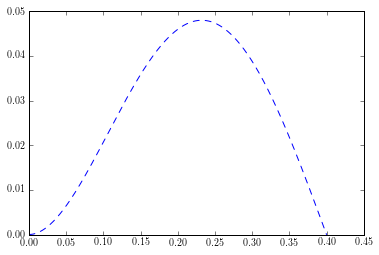

In [201]:
plt.plot(x,U[:,0])

In [233]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(x, U[:,0])
print(spl(0.20000001))
print(spl(0.200000015))
print(spl(0.20000002))
print(spl(0.2003))

0.043772061790854765
0.04377206239552285
0.043772063000190875
0.04380822974151258


In [369]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import UnivariateSpline

def euler_beam_frf(xin=0.22,xout=0.22,fmin=0.0,fmax=1000.0,beamparams=sp.array((7.31e10, 1/12*0.03*.015**3, 2747, .015*0.03, 0.4)), bctype = 2, zeta = 0.02):

    E=beamparams[0];
    I=beamparams[1];
    rho=beamparams[2];
    A=beamparams[3];
    L=beamparams[4];
    np=2001
    i=0
    w=sp.linspace(fmin, fmax, 2001) * 2 * sp.pi
    if min([xin,xout]) < 0 or max([xin,xout]) > L:
        disp_(char('One or both locations are not on the beam'))
        return
    wn=sp.array((0,0))
    # The number 100 is arbitrarily large and unjustified. 
    a = sp.empty([np, 100], dtype=complex)
    f = sp.empty(100)
    
    while wn[-1] < 1.3 * (fmax * 2 * sp.pi):

        i=i + 1
        #legtext[i + 1]=[char('Contribution of mode '),num2str_(i)]
        wn,xx,U=euler_beam_modes(i,bctype,beamparams,5000)
        spl = UnivariateSpline(xx, U[:,i-1])
        Uin = spl(xin)
        Uout = spl(xout)
        #Uin=spline_(xx,U,xin)
        #Uout=spline_(xx,U,xout)
        
        #print(wn[-1])
        #print(w)
        a[:,i-1]=rho * A * Uin * Uout / (wn[-1] ** 2 - w ** 2 + 2 * zeta * wn[-1] * w * sp.sqrt(-1))
        #print(a[0:10,i])
        #plt.plot(sp.log10(sp.absolute(a[:,i])))
        #input("Press Enter to continue...")
        f[i]=wn[-1] / 2 / sp.pi
    a=a[:,0:i]
    plt.subplot(211)
    plt.plot(w / 2 / sp.pi,20 * sp.log10(sp.absolute(sp.sum(a,axis = 1))),'-')
    plt.hold('on')
    plt.plot(w / 2 / sp.pi,20 * sp.log10(sp.absolute(a)),'-')
    plt.grid('on')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FRF (dB)')
    axlim = plt.axis()
    
    plt.axis(axlim + sp.array([0, 0, -0.1*(axlim[3]-axlim[2]), 0.1*(axlim[3]-axlim[2])]))
    
    
    plt.subplot(212)
    plt.plot(w / 2 / sp.pi,sp.unwrap(sp.angle(sp.sum(a,axis = 1))) / sp.pi * 180,'-')
    plt.hold('on')
    plt.plot(w / 2 / sp.pi,sp.unwrap(sp.angle(a)) / sp.pi * 180,'-')
    plt.grid('on')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (deg)')
    axlim = plt.axis()
    plt.axis(axlim + sp.array([0, 0, -0.1*(axlim[3]-axlim[2]), 0.1*(axlim[3]-axlim[2])]))
    

    fout=w / 2 / sp.pi
    H = a
    return fout,H


(0.0, 1000.0, -240.0, -150.0)


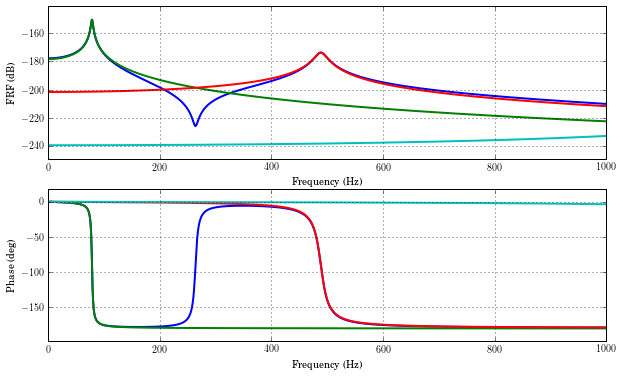

In [374]:
fout, H = euler_beam_frf()

0.0

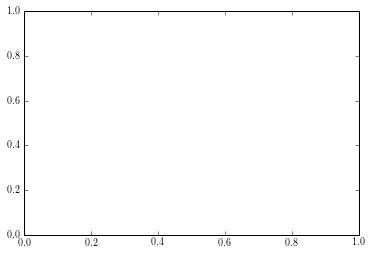

In [349]:
a =plt.axis()
a[0]

In [329]:
H[1,1] = 1+1.j

TypeError: can't convert complex to float

In [224]:
sp.sum(U[0:10,0:10],axis = 1)

array([  0.00000000e+00,   3.22778969e-05,   1.28565322e-04,
         2.88042879e-04,   5.09891177e-04,   7.93290832e-04,
         1.13742248e-03,   1.54146679e-03,   2.00460446e-03,
         2.52601625e-03])